In [1]:
import numpy as np
import pandas as pd

import utils
from sklearn.metrics.pairwise import paired_distances
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns 
import seaborn.objects as so



In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import plotnine as pn

from sklearn.metrics.pairwise import cosine_similarity, paired_distances
from sklearn.preprocessing import StandardScaler, scale
from scipy.spatial import distance

from einops import rearrange, reduce, repeat


In [3]:
import importlib
importlib.reload(utils)


<module 'utils' from '/home/acercyc/Project/Keio Testing_analysis/src/utils.py'>

In [4]:
fn = utils.path_data / 'ana_one_dot_predicting_individual_beh_profile_cossmilarity/prediction.csv'
df = pd.read_csv(fn)

In [5]:
df.head()

,participant,trial no.,actual control,angular bias,response,group,dist_mean,dist_sd,v_mean,v_sd,...,b1,b2,b0,response_pred_stdz,b1_stdz,b2_stdz,b0_stdz,response_pred_p_only,b1_stdz_p_only,b0_stdz_p_only
0,K-Reg-H-10,1,0.30,0,0,H,0.814116,0.797715,0.913790,0.736964,...,-3.44679,-1.133787,2.724355,0,-2.025295,-1.133769,-0.626027,0,-3.635382,1.83945
1,K-Reg-H-10,2,0.80,0,1,H,0.051420,0.154197,0.763800,0.818038,...,-3.44679,-1.133787,2.724355,1,-2.025295,-1.133769,-0.626027,1,-3.635382,1.83945
2,K-Reg-H-10,3,0.30,0,0,H,0.606636,0.576845,1.031310,0.690626,...,-3.44679,-1.133787,2.724355,0,-2.025295,-1.133769,-0.626027,0,-3.635382,1.83945
3,K-Reg-H-10,4,0.55,90,0,H,0.972314,0.794221,1.040956,0.807353,...,-3.44679,-1.133787,2.724355,0,-2.025295,-1.133769,-0.626027,0,-3.635382,1.83945
4,K-Reg-H-10,5,0.30,90,0,H,0.932129,0.663194,0.980944,0.668587,...,-3.44679,-1.133787,2.724355,0,-2.025295,-1.133769,-0.626027,0,-3.635382,1.83945


In [6]:
predVar = 'response_pred_stdz'
df_ = df.copy()
df_ = df_.melt(['participant', 'actual control', 'angular bias', 'group'], ['response', predVar], 
               var_name='response_type', value_name='response')
df_ = df_.groupby(['participant', 'actual control', 'angular bias', 'group', 'response_type']).mean()
df_ = df_.reset_index()
df_.head()

/tmp/ipykernel_64766/1305714369.py:3: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.


,participant,actual control,angular bias,group,response_type,response
0,K-Reg-H-10,0.30,0,H,response,0.1
1,K-Reg-H-10,0.30,0,H,response_pred_stdz,0.0
2,K-Reg-H-10,0.30,90,H,response,0.0
3,K-Reg-H-10,0.30,90,H,response_pred_stdz,0.0
4,K-Reg-H-10,0.55,0,H,response,1.0


In [7]:
# df_ = df_[['participant', 'actual control', 'angular bias', 'response_pred', 'group']]
# df_ = df_.groupby(['participant', 'actual control', 'angular bias', 'group']).mean()
# df_ = df_.reset_index()

# grid = sns.FacetGrid(col='participant', col_wrap=5, data=df_)
# grid.map_dataframe(sns.pointplot, 
#                    x='actual control', 
#                    y='response_pred', 
#                    hue='angular bias')
# grid.add_legend()


# plt.figure()
# sns.catplot(x='actual control', y='response_pred', hue='angular bias', data=df_, col='group', kind='point')

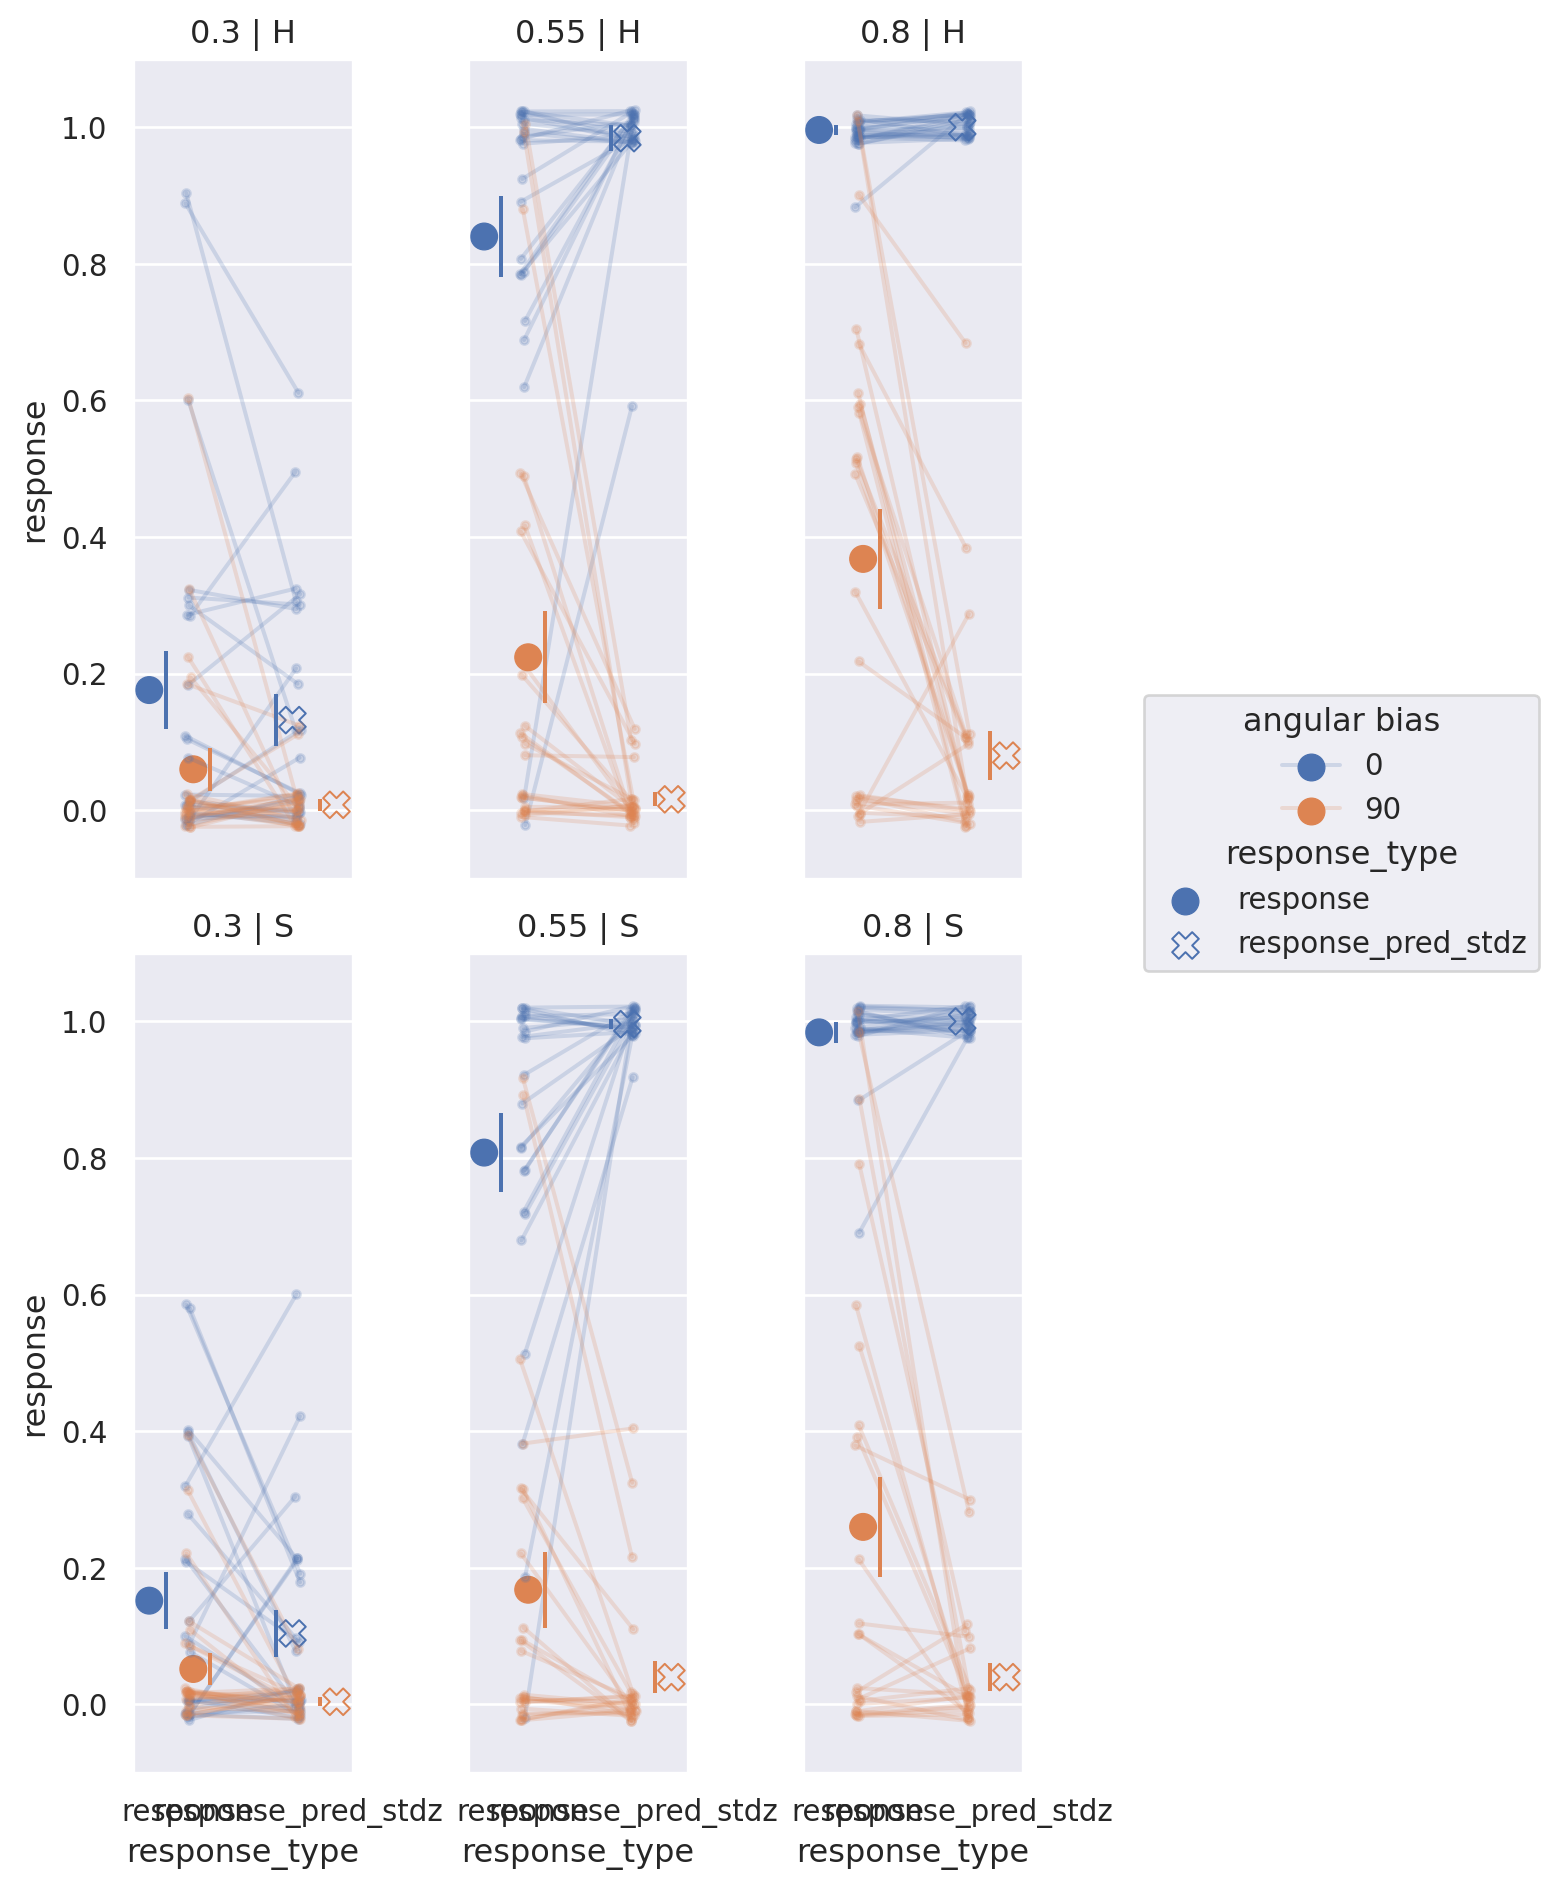

In [8]:
# f = plt.figure(figsize=(10, 5))
# df_['angular bias'] = pd.Categorical(df_['angular bias'])
df_['angular bias'] = df_['angular bias'].astype('str')
df_['actual control'] = df_['actual control'].astype('str')

gap = 0.1
byVar = ['response', 'actual control', 'angular bias', 'response_type']

g = (
    so.Plot(df_, x='response_type', y='response', color='angular bias')
    # .add(so.Dots(alpha=0.2), so.Jitter(x=.05, y=.05))
    # .pair(x=["actual control", 'angular bias'])
    # .facet(row="group")    
    .add(so.Line(alpha=0.2, marker='.'), so.Agg(),  so.Jitter(x=.05, y=.05), group="participant")
    # .add(so.Range(), so.Est(errorbar="se"))
    .add(so.Dot(pointsize=10), so.Agg(), so.Dodge(), marker='response_type', fill='response_type')
    .add(so.Range(), so.Est(errorbar="se"), so.Dodge())
    .facet(row="group", col='actual control')
    .layout(size=(6, 10))
    .limit(y=(-0.1, 1.1))
    # .on(f)
  
)
g
# print(g)
# fn = utils.Save.savepath('report_three_dot_prediction_group', 'real_pred_group_performce.pdf')
# g.save(fn)


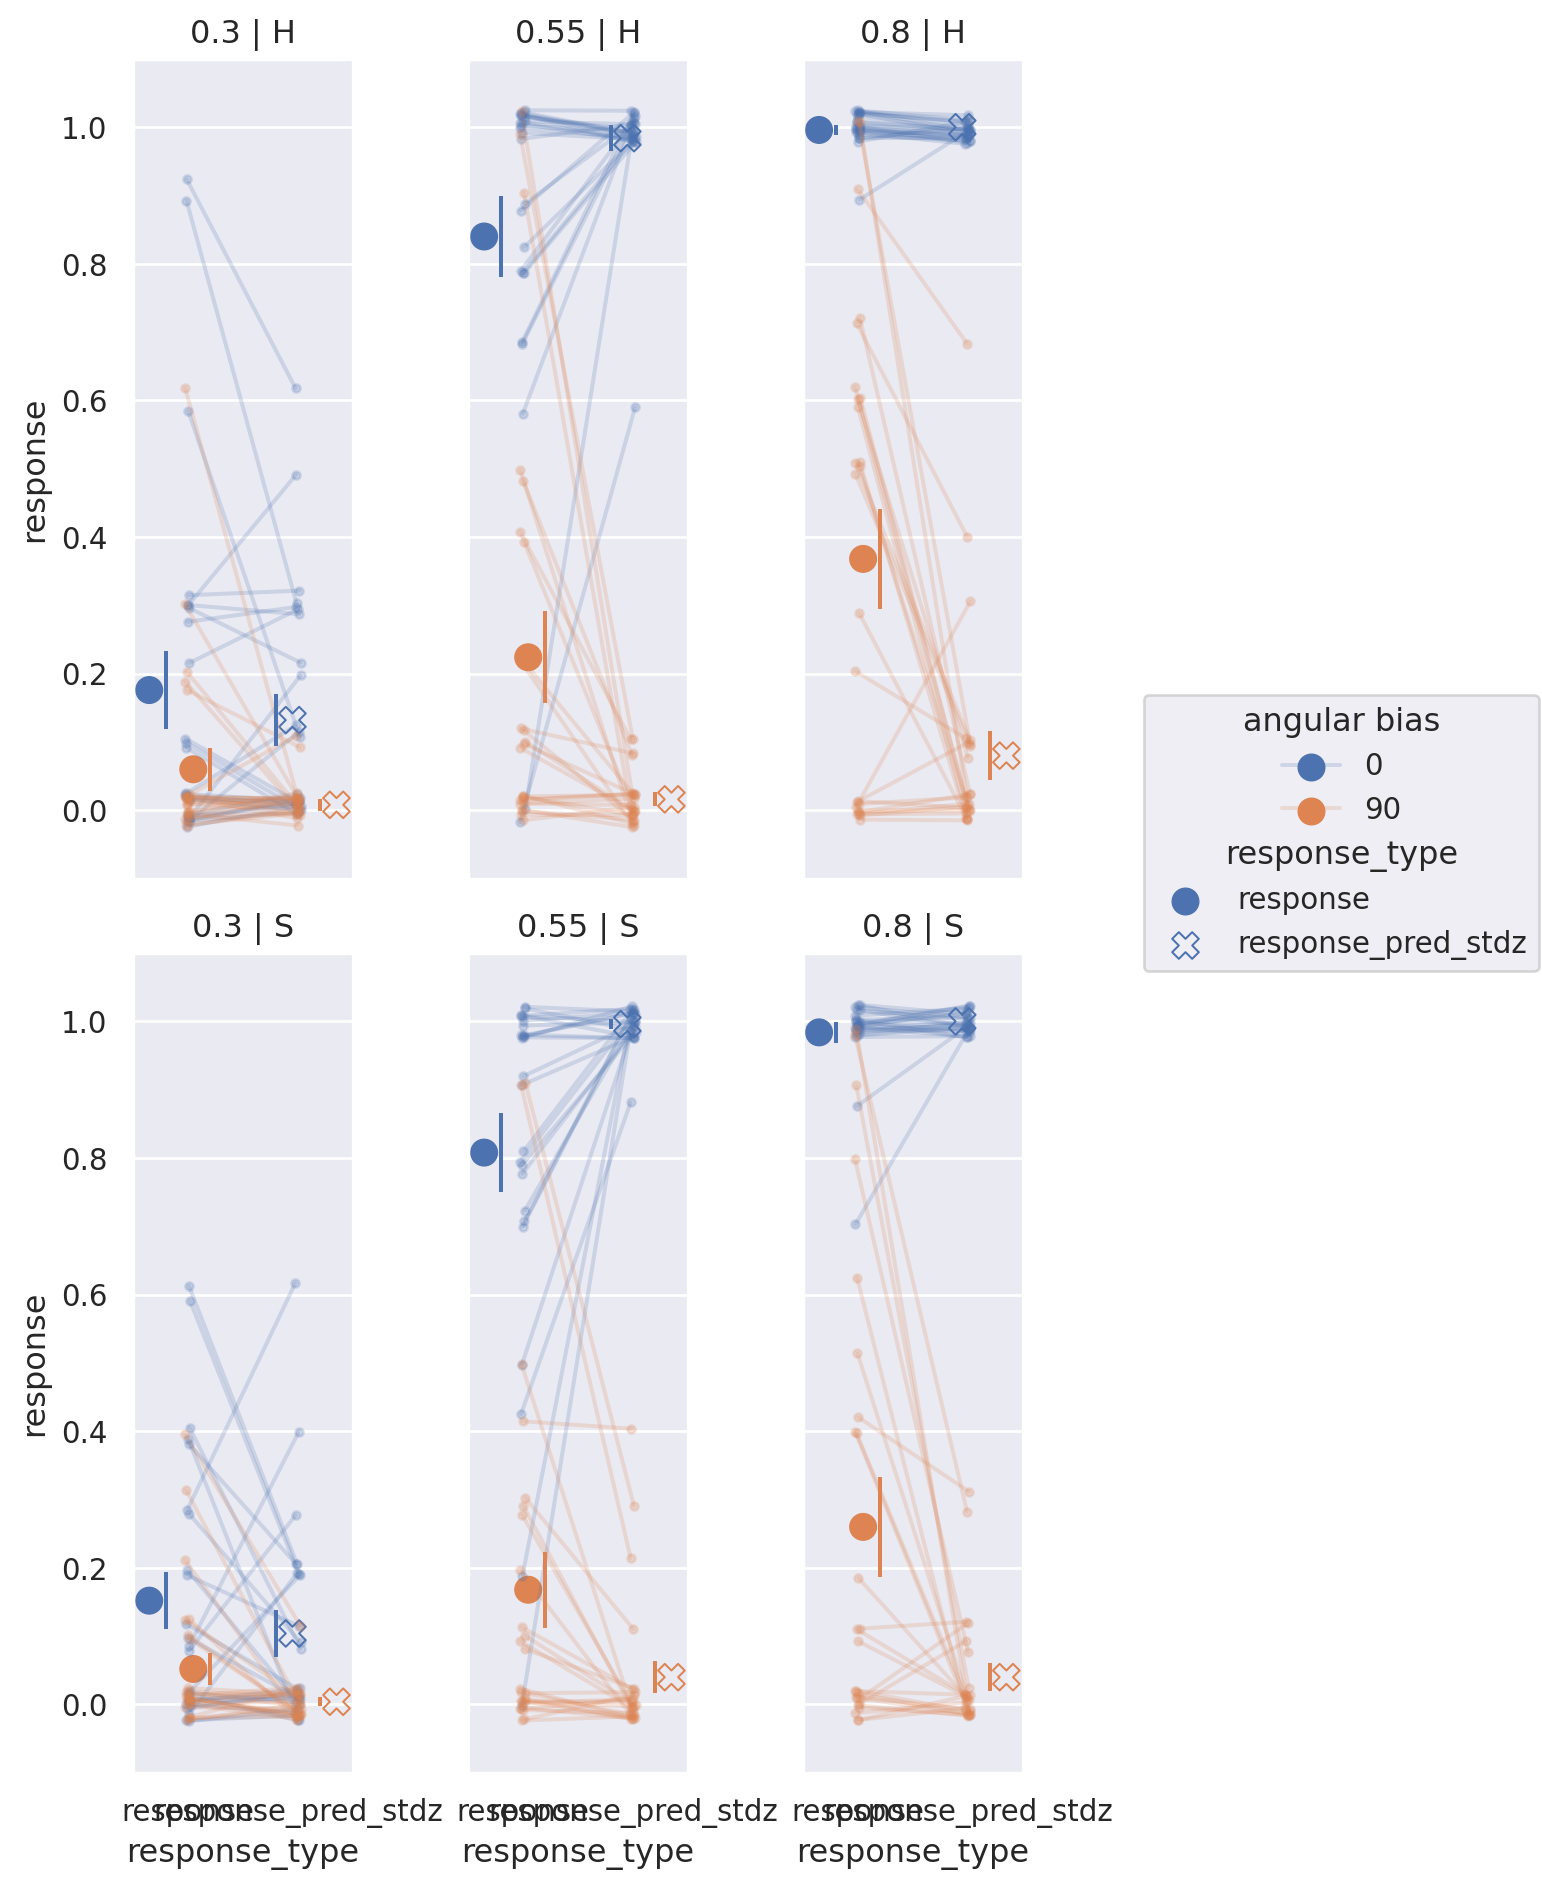

In [9]:
# print(g)
fn = utils.Save.savepath('report_one_dot_predicting_group_cosinesimilarity', 'real_pred_group_performce.pdf')
g.save(fn)


In [33]:
predVar = 'response_pred'
df_ = df.copy()
# df_ = df_.melt(['participant', 'actual control', 'angular bias', 'group'], ['response', predVar], 
#                var_name='response_type', value_name='response')
df_ = df_.groupby(['participant', 'actual control', 'angular bias', 'group']).mean()
df_ = df_.reset_index()
df_.head()

,participant,actual control,angular bias,group,trial no.,response,dist_mean,dist_sd,v_mean,v_sd,...,b1,b2,b0,response_pred_stdz,b1_stdz,b2_stdz,b0_stdz,response_pred_p_only,b1_stdz_p_only,b0_stdz_p_only
0,K-Reg-H-10,0.30,0,H,24.4,0.1,0.771607,0.667468,0.937608,0.707579,...,-3.44679,-1.133787,2.724355,0.0,-2.025295,-1.133769,-0.626027,0.0,-3.635382,1.83945
1,K-Reg-H-10,0.30,90,H,30.0,0.0,0.945339,0.701454,0.962041,0.704085,...,-3.44679,-1.133787,2.724355,0.0,-2.025295,-1.133769,-0.626027,0.0,-3.635382,1.83945
2,K-Reg-H-10,0.55,0,H,37.1,1.0,0.238722,0.248492,0.836019,0.700166,...,-3.44679,-1.133787,2.724355,1.0,-2.025295,-1.133769,-0.626027,1.0,-3.635382,1.83945
3,K-Reg-H-10,0.55,90,H,28.8,0.0,0.892368,0.692534,0.990788,0.752664,...,-3.44679,-1.133787,2.724355,0.0,-2.025295,-1.133769,-0.626027,0.0,-3.635382,1.83945
4,K-Reg-H-10,0.80,0,H,29.6,1.0,0.088934,0.219984,0.650327,0.763478,...,-3.44679,-1.133787,2.724355,1.0,-2.025295,-1.133769,-0.626027,1.0,-3.635382,1.83945


In [34]:
df_count = df_.value_counts(['group', 'response', predVar])
# df_count.columns = ['count']
df_count = df_count.reset_index()
df_count = df_count.sort_values(by='group')

df_count.rename(columns={0:'Frequency'}, inplace=True)

# scaling 
df_count['Frequency'] = (df_count['Frequency'])**(1/2)

<AxesSubplot: title={'center': 'group = S'}, xlabel='response', ylabel='response_pred'>

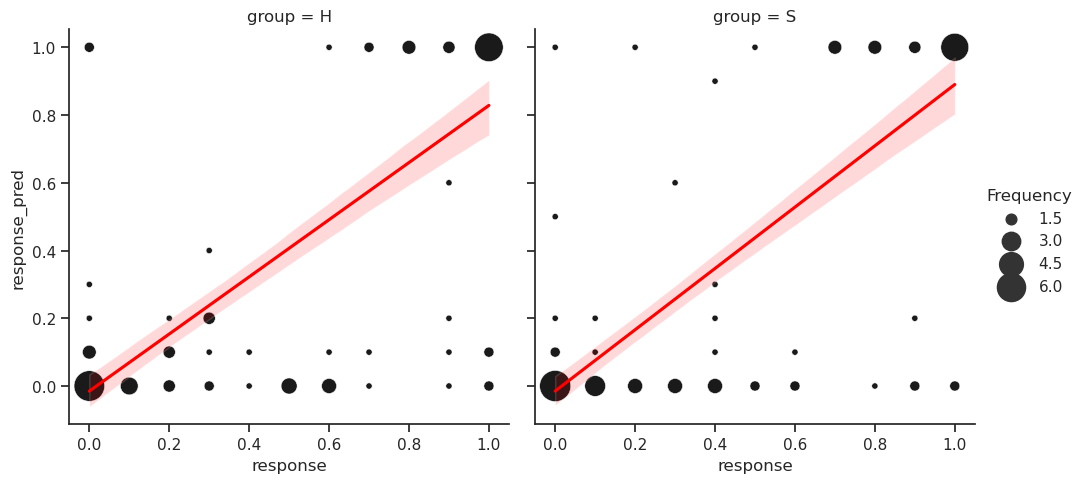

In [35]:
g = sns.relplot(data=df_count, x='response', y=predVar, 
                size='Frequency', color='k',
                sizes=(20, 500), col='group', height=5)
ax = g.figure.get_axes()
sns.regplot(data=df_.query('group=="H"'), x='response', y=predVar, color='red', scatter=False, ax=ax[0])
sns.regplot(data=df_.query('group=="S"'), x='response', y=predVar, color='red', scatter=False, ax=ax[1])

In [36]:


# g = sns.relplot(data=df_count, x='response', y='response_pred_p_only', 
#                 size='Frequency', color='k',
#                 sizes=(20, 500), col='group', height=5)
# g.map(sns.regplot, 'response', 'response_pred_p_only', color='red', scatter=False)
# g.set_axis_labels('Groud true response', 'Predicted response')


In [37]:
fn = utils.Save.savepath('report_one_dot_predicting_group_cosinesimilarity', 'correlation.pdf')
g.savefig(fn)

In [38]:
import pingouin as pg   
df_.groupby(['group']).apply(lambda x: pg.corr(x['response'].values, x[predVar].values))

,,n,r,CI95%,p-val,BF10,power
group,,,,,,,
H,pearson,150,0.793108,"[0.72, 0.85]",1.114204e-33,2.851e+30,1.0
S,pearson,150,0.823786,"[0.76, 0.87]",2.618132e-38,1.014e+35,1.0


## Only use action plan position

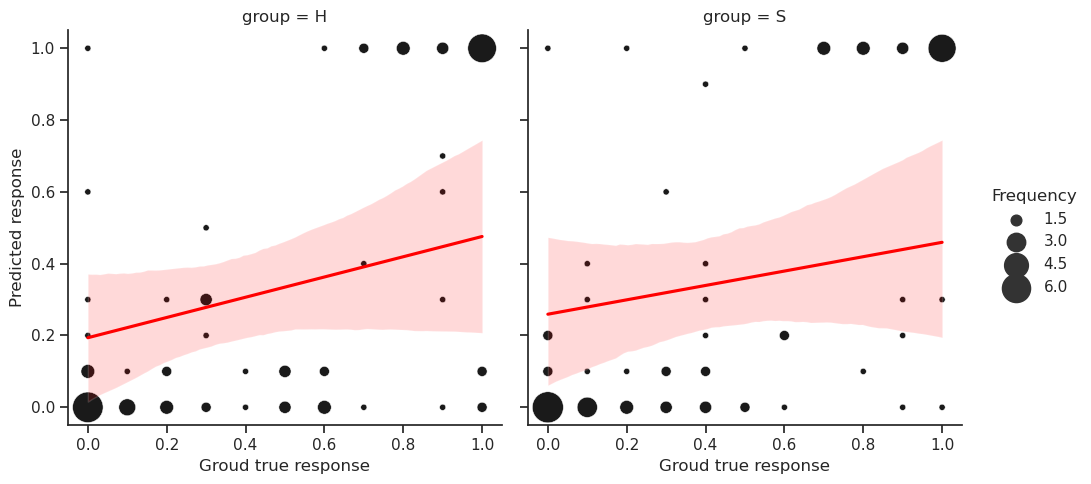

In [39]:
df_count = df_.value_counts(['group', 'response', 'response_pred_stdz'])
# df_count.columns = ['count']
df_count = df_count.reset_index()
df_count = df_count.sort_values(by='group')

df_count.rename(columns={0:'Frequency'}, inplace=True)

# scaling 
df_count['Frequency'] = (df_count['Frequency'])**(1/2)

g = sns.relplot(data=df_count, x='response', y='response_pred_stdz', 
                size='Frequency', color='k',
                sizes=(20, 500), col='group', height=5)
g.map(sns.regplot, 'response', 'response_pred_stdz', color='red', scatter=False)
g.set_axis_labels('Groud true response', 'Predicted response')


# Regression coefficients for the one dot predicting group

In [40]:
df.head()

,participant,trial no.,actual control,angular bias,response,group,dist_mean,dist_sd,v_mean,v_sd,...,b1,b2,b0,response_pred_stdz,b1_stdz,b2_stdz,b0_stdz,response_pred_p_only,b1_stdz_p_only,b0_stdz_p_only
0,K-Reg-H-10,1,0.30,0,0,H,0.814116,0.797715,0.913790,0.736964,...,-3.44679,-1.133787,2.724355,0,-2.025295,-1.133769,-0.626027,0,-3.635382,1.83945
1,K-Reg-H-10,2,0.80,0,1,H,0.051420,0.154197,0.763800,0.818038,...,-3.44679,-1.133787,2.724355,1,-2.025295,-1.133769,-0.626027,1,-3.635382,1.83945
2,K-Reg-H-10,3,0.30,0,0,H,0.606636,0.576845,1.031310,0.690626,...,-3.44679,-1.133787,2.724355,0,-2.025295,-1.133769,-0.626027,0,-3.635382,1.83945
3,K-Reg-H-10,4,0.55,90,0,H,0.972314,0.794221,1.040956,0.807353,...,-3.44679,-1.133787,2.724355,0,-2.025295,-1.133769,-0.626027,0,-3.635382,1.83945
4,K-Reg-H-10,5,0.30,90,0,H,0.932129,0.663194,0.980944,0.668587,...,-3.44679,-1.133787,2.724355,0,-2.025295,-1.133769,-0.626027,0,-3.635382,1.83945


,participant,group,b0,b1,b2
0,K-Reg-H-10,Health,2.724355,-3.446790,-1.133787
1,K-Reg-H-11,Health,2.681115,-3.593292,-1.048428
2,K-Reg-H-12,Health,2.358289,-3.216117,-1.486982
3,K-Reg-H-13,Health,2.031645,-3.776879,-0.303949
4,K-Reg-H-14,Health,2.430144,-3.584352,-0.720955


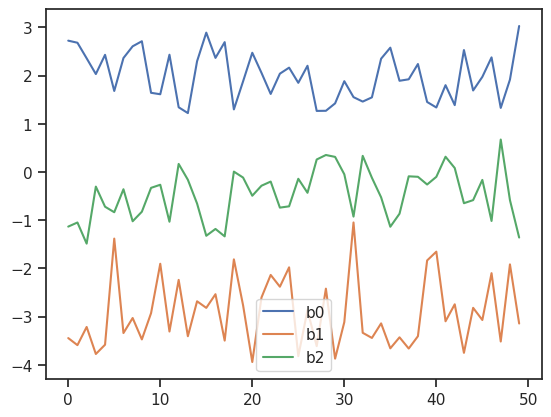

In [41]:
df_ = df[['participant', 'group', 'b0', 'b1', 'b2']].groupby(['participant', 'group']).mean()
df_ = df_.reset_index()
df_ = df_.replace({'group': {'H': 'Health', 'S': 'Patient'}})
df_.plot()
df_.head()



## b1

(-4.0, 0.0)

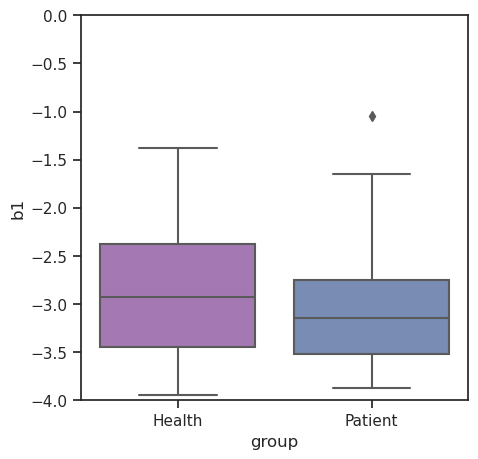

In [42]:

fig, ax = plt.subplots(figsize=(5, 5))
sns.set_theme(style='ticks')
sns.boxplot(data=df_, x="group", y="b1", palette=utils.Plot.palette_group)
# sns.despine(offset=10, trim=True)
# sns.set(ylim=(-5, 1))
plt.ylim(-4, 0)


In [43]:
fn = utils.Save.savepath('report_one_dot_predicting_group_cosinesimilarity', 'b1.pdf')
fig.savefig(fn)

In [44]:
from pingouin import ttest
df_.groupby(['group']).apply(lambda x: ttest(x['b1'].values, 0))

,,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
group,,,,,,,,,
Health,T-test,-20.823703,24,two-sided,7.153019e-17,"[-3.16, -2.59]",4.164741,6.677e+13,1.0
Patient,T-test,-19.752960,24,two-sided,2.374240e-16,"[-3.29, -2.67]",3.950592,2.127e+13,1.0


In [45]:
# ttest between groups
g1 = df_[df_['group'] == 'Health']['b1'].values
g2 = df_[df_['group'] == 'Patient']['b1'].values
ttest(g1, g2)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,0.528554,48,two-sided,0.59955,"[-0.3, 0.52]",0.149498,0.317,0.08127


## b2

<AxesSubplot: xlabel='group', ylabel='b2'>

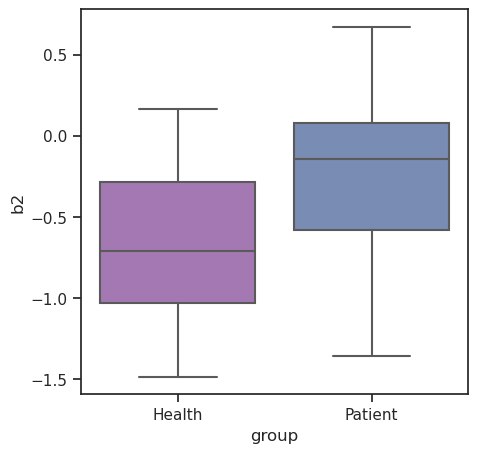

In [46]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.set_theme(style='ticks')
sns.boxplot(data=df_, x="group", y="b2", palette=utils.Plot.palette_group)

In [47]:
fn = utils.Save.savepath('report_one_dot_predicting_group_cosinesimilarity', 'b2.pdf')
fig.savefig(fn)

In [48]:
from pingouin import ttest
df_.groupby(['group']).apply(lambda x: ttest(x['b2'].values, 0))

,,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
group,,,,,,,,,
Health,T-test,-7.110676,24,two-sided,2.378936e-07,"[-0.85, -0.47]",1.422135,6.738e+04,1.000000
Patient,T-test,-2.581005,24,two-sided,1.639246e-02,"[-0.49, -0.05]",0.516201,3.164,0.697326


In [49]:
# ttest between groups
g1 = df_[df_['group'] == 'Health']['b2'].values
g2 = df_[df_['group'] == 'Patient']['b2'].values
ttest(g1, g2)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-2.75018,48,two-sided,0.008374,"[-0.67, -0.1]",0.777868,5.558,0.768778
